In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

In [2]:
import data_manipulation 
import data_dictionary  
import data_visualization
import data_preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 70)

In [4]:
original_data_file_name = 'SEERA dataset original raw data'

In [5]:
original_data = data_manipulation.read_data(original_data_file_name, header = 1)
original_data

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.0,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.0,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.0,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2018,38,1,2,16,1,13,2.0,3.0,?,4,7,65,2,NaN,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,...,1,2,2,1,8,1,0,1,1,4,2,8,2,1,1,1,1,1,2,2,5,2,3,NaN,1.44444,4,1,1,4,3,2,1,2,3,2
116,117,1998,4,4,1,3,3,3,6.0,18.0,0,1,1,50,2,NaN,7128,21384.0,6,5,7,?,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,...,2,3,5,4,12,2,20,6,3,3,4,8,1,1,7,2,2,0,3,NaN,4,3,3,NaN,4.11111,?,1,1,1,4,1,1,1,1,2
117,118,2006,14,2,2,16,6,13,2.0,5.0,?,1,5,11,2,NaN,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,...,2,3,2,0,8,1,0,2,4,3,1,8,1,1,7,2,1,0,3,NaN,5,3,3,NaN,1.44444,1,4,3,4,4,1,1,2,1,1
118,119,2016,43,6,1,16,11,13,3.0,12.0,?,2,7,67,2,NaN,792,3168.0,6,4,2,1,1,7,3,2,4,1,6,2.25,2,1.888889,2.746032,4.111111,1,...,1,3,2,1,8,1,0,3,4,1,1,8,3,1,1,2,1,0,3,NaN,3,3,3,NaN,1.44444,1,1,3,1,1,2,1,2,3,2


In [6]:
data = original_data.copy()

In [7]:
data = data.set_index('ProjID')
data = data.drop('Organization id', axis = 1)
data

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
ProjID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,3,0,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
2,2016,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,3,0,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
3,2008,5,3,2,2,3,3.0,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,2,1,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
4,2009,4,2,3,2,4,6.0,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,1,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
5,2016,4,2,3,2,4,12.0,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,2,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018,1,2,16,1,13,2.0,3.0,?,4,7,65,2,NaN,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,2,0,...,1,2,2,1,8,1,0,1,1,4,2,8,2,1,1,1,1,1,2,2,5,2,3,NaN,1.44444,4,1,1,4,3,2,1,2,3,2
117,1998,4,1,3,3,3,6.0,18.0,0,1,1,50,2,NaN,7128,21384.0,6,5,7,?,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,2,1,...,2,3,5,4,12,2,20,6,3,3,4,8,1,1,7,2,2,0,3,NaN,4,3,3,NaN,4.11111,?,1,1,1,4,1,1,1,1,2
118,2006,2,2,16,6,13,2.0,5.0,?,1,5,11,2,NaN,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,3,1,...,2,3,2,0,8,1,0,2,4,3,1,8,1,1,7,2,1,0,3,NaN,5,3,3,NaN,1.44444,1,4,3,4,4,1,1,2,1,1


In [8]:
data.describe()

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Economic instability impact,Top management support,Top management opinion of previous system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,DBMS expert availability,Team size,Dedicated team members,Daily working hours,Methodology,Multiple programing languages,Programming language used,DBMS used,Open source software
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,13.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2011.958333,4.550000,1.97500,7.841667,4.366667,7.941667,5.670833,10.375000,1.516667,4.30000,2.241667,13707.846154,5225.183333,9060.929167,4.341667,1.958333,3.675000,0.625000,2.612500,1.575000,3.137037,2.653439,2.548148,0.708333,5.741667,4.266667,8.258333,2.283333,1.191667,7.433333,2.541667,0.341667
std,6.267692,1.358756,1.05689,6.201106,4.134165,4.784948,3.685793,8.903604,0.987173,2.35004,0.819877,44289.853819,6881.106926,12598.482007,1.621784,1.252868,1.131389,0.486153,0.777743,0.617157,1.354082,1.102471,1.367120,0.456435,6.343787,6.446592,1.600923,1.278019,0.472715,4.351631,1.352842,0.476257
min,1993.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000,1.00000,1.000000,5.000000,176.000000,396.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.888889,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2008.750000,4.000000,1.00000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000,2.00000,2.000000,7.000000,1278.750000,2112.000000,3.000000,1.000000,4.000000,0.000000,2.000000,1.000000,1.888889,1.634921,1.444444,0.000000,3.000000,1.000000,8.000000,1.000000,1.000000,6.000000,2.000000,0.000000
50%,2014.000000,5.000000,2.00000,4.500000,2.000000,10.000000,5.000000,8.000000,1.000000,5.00000,2.000000,50.000000,2860.000000,4576.000000,4.000000,1.000000,4.000000,1.000000,2.500000,2.000000,1.888889,2.746032,1.888889,1.000000,5.000000,3.000000,8.000000,2.000000,1.000000,7.000000,2.000000,0.000000
75%,2017.000000,5.000000,2.00000,16.000000,8.000000,13.000000,7.000000,12.000000,1.250000,7.00000,2.000000,76.000000,6336.000000,10032.000000,5.000000,3.000000,4.000000,1.000000,3.000000,2.000000,4.555556,3.539683,4.111111,1.000000,6.000000,5.000000,8.000000,3.000000,1.000000,9.000000,3.000000,1.000000
max,2019.000000,8.000000,8.00000,17.000000,12.000000,17.000000,20.000000,48.000000,4.000000,7.00000,5.000000,160236.000000,50688.000000,79200.000000,8.000000,7.000000,5.000000,1.000000,4.750000,3.000000,5.000000,4.809524,5.000000,1.000000,48.000000,48.000000,14.000000,7.000000,3.000000,25.000000,5.000000,1.000000


# Data Pre-Processing

## Missing values


In [9]:
#In our project, missing values are represented with a '?', so we have to replace this value with a np.nan
data = data_preprocessing.define_missing_values(data)

Text(0.5, 1.0, 'Initial missing values map')

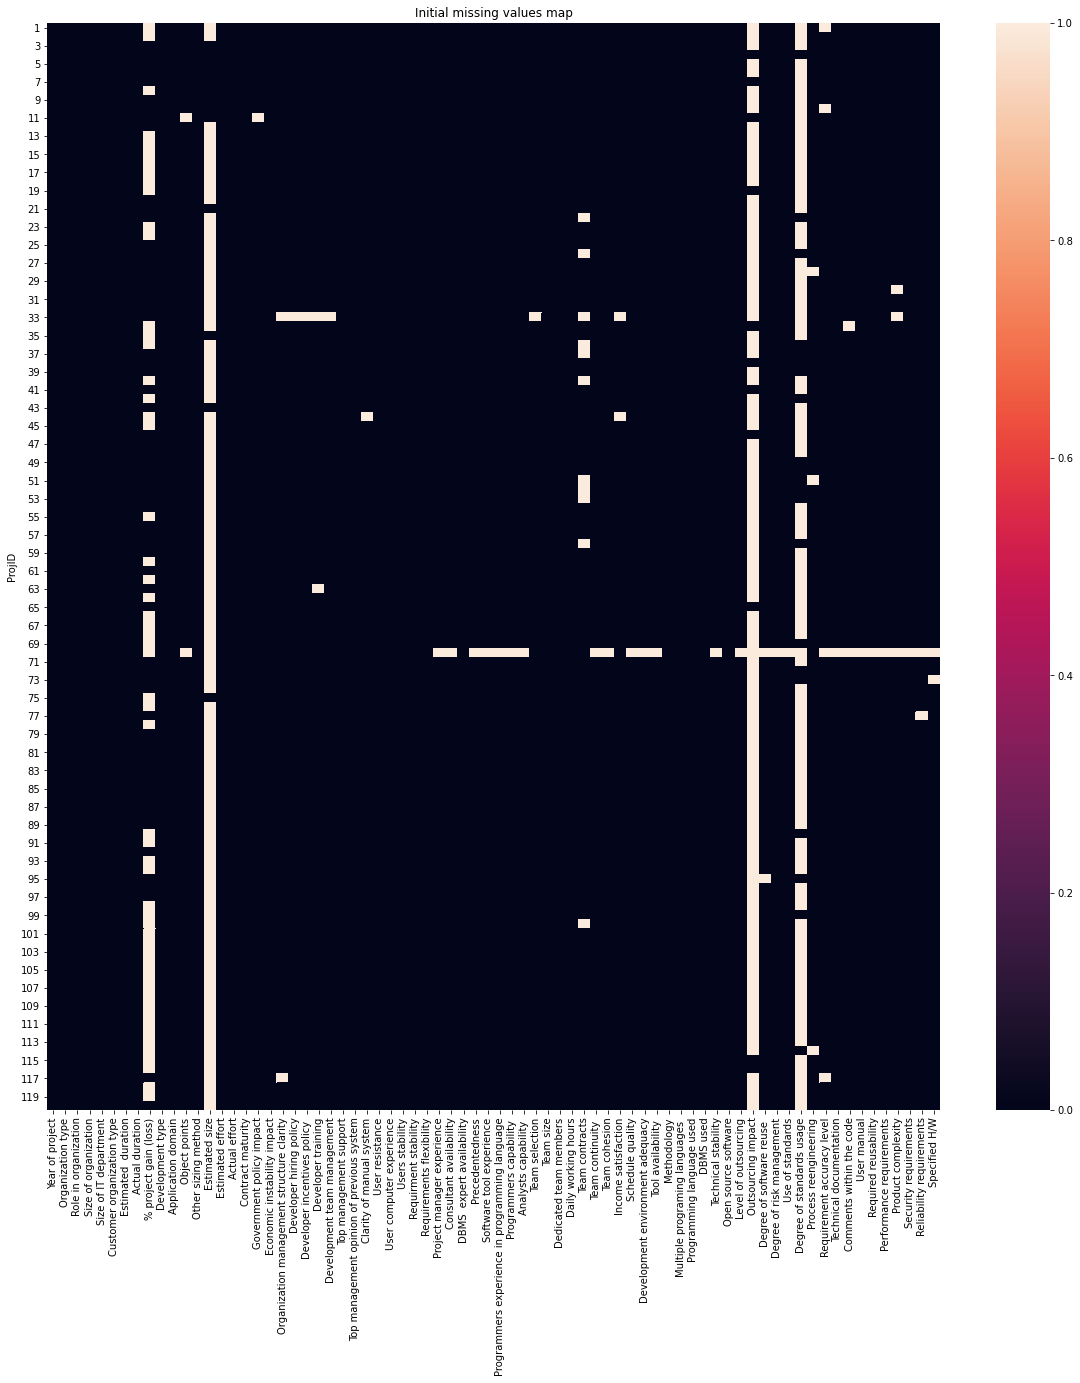

In [10]:
plt.figure(figsize = (20, 20))
data_visualization.missing_values_map(data)
plt.title('Initial missing values map')

In [11]:
#These are the missing values rates for each column in our dataset
nan_rates_cols = data_visualization.nan_columns_rates(data)
nan_rates_cols

Outsourcing impact           0.908333
Estimated size               0.891667
Degree of standards usage    0.825000
% project gain (loss)        0.466667
Team contracts               0.091667
                               ...   
Users stability              0.000000
Requirment stability         0.000000
Requirements flexibility     0.000000
DBMS used                    0.000000
Year of project              0.000000
Length: 74, dtype: float64

In [12]:
#We will drop all columns that have more than 40% missing values, and store the new dataset in a variable
data = data_preprocessing.drop_missing_values_cols(data, nan_rates_cols, 0.4)
data.shape

(120, 70)

In [13]:
nan_rates_rows = data_visualization.nan_rows_rates(data)
nan_rates_rows

ProjID
70     0.400000
33     0.128571
11     0.028571
117    0.028571
51     0.028571
         ...   
83     0.000000
84     0.000000
85     0.000000
86     0.000000
60     0.000000
Length: 120, dtype: float64

In [14]:
data = data_preprocessing.drop_missing_values_rows(data, nan_rates_rows, 0.4)
data.shape

(119, 70)

Text(0.5, 1.0, 'Missing values map after droping rows and columns')

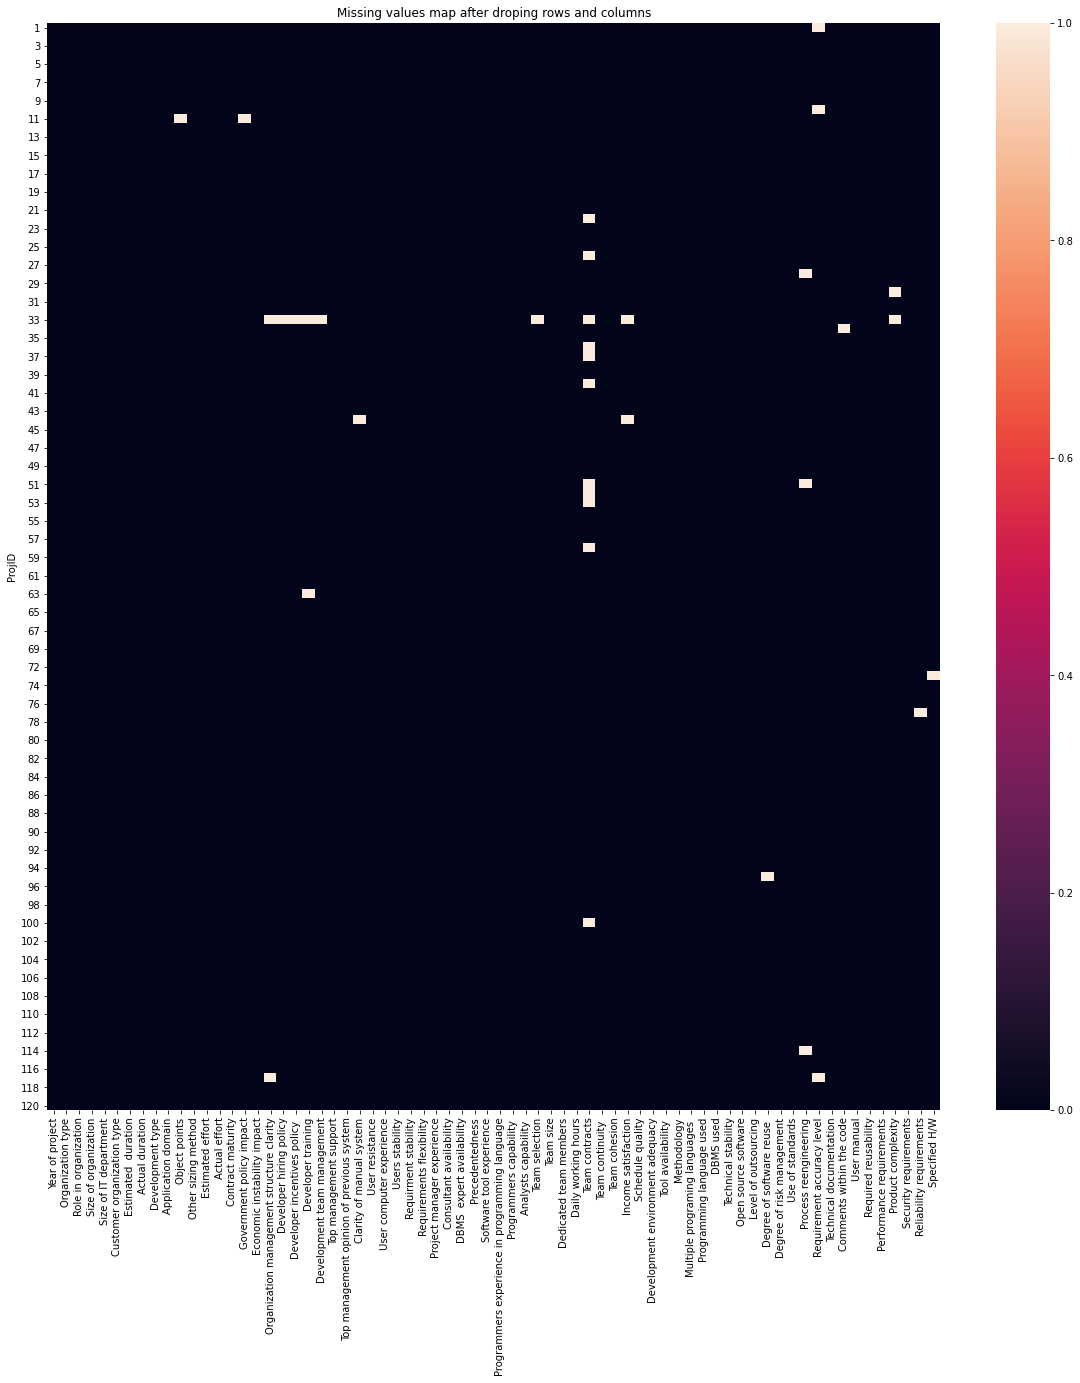

In [15]:
plt.figure(figsize = (20, 20))
data_visualization.missing_values_map(data)
plt.title('Missing values map after droping rows and columns')

## Imputation

In [16]:
#Find columns that we will impute
cols_nan = data_preprocessing.missing_values_columns(data)
cols_nan.sort_values()

Index(['Clarity of manual system', 'Comments within the code',
       'Degree of software reuse ', 'Developer hiring policy',
       'Developer incentives policy ', 'Developer training',
       'Development team management', 'Government policy impact',
       'Income satisfaction', 'Object points',
       'Organization management structure clarity', 'Process reengineering',
       'Product complexity', 'Reliability requirements',
       'Requirement accuracy level', 'Specified H/W', 'Team contracts',
       'Team selection'],
      dtype='object')

### Replacing categorical data missing values

In [17]:

categorical_columns = []
number_columns = []
for col in cols_nan:
    if data_dictionary.values_meaning(col) != None:
        categorical_columns.append(col)
    else:
        number_columns.append(col) 

In [18]:
data_imputed = data_preprocessing.categorial_cols_imputation(data, categorical_columns)

In [19]:
number_columns

['Object points',
 'Developer incentives policy ',
 'Development team management',
 'Clarity of manual system',
 'Team contracts',
 'Process reengineering']

In [21]:
data['Team contracts'].unique()

array([ 1.,  2.,  4.,  3., nan,  5.])